## Brand Sentiment Analysis

In [43]:
# Summary

# This analysis takes a brand name - or any other queries string that would produce results in a Google News search -
# and calculate the sentiment over approximately 100 news articles. It does so by collecting URLs from a Google News
# search using BeautifulSoup and then determine the sentiment scores of the individual news articles using TextBlob.
# The sentiment scores are then compiled and the analysis will show the average sentiment score and the number of
# the positive, neutral, and negative news articles. It will also provide a pie chart visualizing the brand sentiment.

In [31]:
# Import all the necessary libraries/packages.

import pandas as pd
import numpy as np
import requests as req
import time
import random
import matplotlib.pyplot as plt

from newspaper import Article
from textblob import TextBlob
from bs4 import BeautifulSoup

# Import warnings and set filter warnings to ignore due to the use of deprecated code  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Sources: https://news.google.com/

In [4]:
def get_news_urls(query, num_articles=10):
    # Define the base URL for Google News
    base_url = "https://news.google.com"

    # Construct the search URL with the query and number of articles
    search_url = f"{base_url}/search?q={query}&num={num_articles}"

    # Define a list of user agents to rotate through for each request
    user_agents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    ]

    # Define headers with a random user agent and referrer
    headers = {
        'User-Agent': random.choice(user_agents),
        'Referrer': 'https://www.google.com/',
    }

    # Send a GET request to Google News search URL with defined headers
    response = req.get(search_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract article URLs from the search results
    article_urls = [a['href'] for a in soup.find_all('a', {'class': 'JtKRv'})]

    # Prepend base URL to each article URL and return the list
    return [f"{base_url}{url}" for url in article_urls]

In [5]:
def get_article(url):
    # Create an Article object and download the article content
    article = Article(url)
    article.download()

    # Parse the downloaded article content
    article.parse()

    # Return the parsed text of the article
    return article.text    

def analyze_sentiment(text):
    # Create a TextBlob object for the text
    analysis = TextBlob(text)

    # Return the polarity score of the sentiment analysis
    return analysis.sentiment.polarity

def get_sentiment(article_url):
    try:
        # Fetch the text of the news article from the provided URL
        article_text = get_article(article_url)

        # Analyze the sentiment of the article text
        sentiment_score = analyze_sentiment(article_text)

        # Return the sentiment score
        return sentiment_score
    except Exception as e:
        # Print an error message if there's an exception
        print(f"Error fetching article from {url}: {e}")

In [27]:
brand_name = "Taylor Swift"  # Replace with the brand name you are interested in
num_articles = 10  # Adjust as needed

sentiments_list = [] # List to store article URLs and sentiment scores
article_counter = 1 # Counter to keep track of processed articles

# Retrieve news URLs related to the brand
news_urls = get_news_urls(brand_name, num_articles)

# Print the number of articles found and iterate through each URL
print(f"Found {len(news_urls)} news articles with '{brand_name}' in the title:")
for url in news_urls:
    sentiment = get_sentiment(url)
    new_sentiments_entry = (url, sentiment)
    sentiments_list.append(new_sentiments_entry)
    
    if article_counter%10 == 0:
        print("Taking a 30-second nap...")
        time.sleep(30)  # Pause for 30 seconds after every 10 articles to apease the Google Gods
    else:
        print("Waiting 2 seconds for next request...")
        time.sleep(2)  # Pause for 2 seconds before making the next request
        
    article_counter = article_counter +1

# Print the list of article URLs and sentiment scores
print(sentiments_list)

Found 106 news articles with 'Taylor Swift' in the title:
Waiting 2 seconds for next request...
Waiting 2 seconds for next request...
Waiting 2 seconds for next request...
Error fetching article from https://news.google.com./articles/CBMiiQFodHRwczovL3d3dy5mb3JiZXMuY29tL3NpdGVzL2h1Z2htY2ludHlyZS8yMDI0LzAyLzE3L3RheWxvci1zd2lmdC1mYW5zLXJlcG9ydGVkbHktZm9yY2VkLXRyYXZpcy1rZWxjZS10by1tb3ZlLW91dC1vZi1oaXMtYnJhbmQtbmV3LWhvdXNlL9IBjQFodHRwczovL3d3dy5mb3JiZXMuY29tL3NpdGVzL2h1Z2htY2ludHlyZS8yMDI0LzAyLzE3L3RheWxvci1zd2lmdC1mYW5zLXJlcG9ydGVkbHktZm9yY2VkLXRyYXZpcy1rZWxjZS10by1tb3ZlLW91dC1vZi1oaXMtYnJhbmQtbmV3LWhvdXNlL2FtcC8?hl=en-US&gl=US&ceid=US%3Aen: 
Waiting 2 seconds for next request...
Waiting 2 seconds for next request...
Waiting 2 seconds for next request...
Waiting 2 seconds for next request...
Error fetching article from https://news.google.com./articles/CBMiU2h0dHBzOi8vcGFyYWRlLmNvbS9uZXdzL2VzcG4tYW5hbHlzdC1yb2JlcnQtZ3JpZmZpbi1paWktYm9sZC1jbGFpbS10YXlsb3Itc3dpZnQtbmZs0gEA?hl=en-US&gl=US&ce

In [28]:
# Print the length of the sentiments_list
print(len(sentiments_list))

106


In [29]:
number_sentiments = 0  # Counter for the number of sentiments
total_scores_sentiments = 0  # Total of sentiment scores
positive_sentiments = 0  # Counter for positive sentiments
neutral_sentiments = 0  # Counter for neutral sentiments
negative_sentiments = 0  # Counter for negative sentiments

# Iterate through each sentiment entry in the list
for sentiment in sentiments_list:
    number_sentiments += 1  # Increment the number of sentiments
    
    # Try converting the sentiment score to a float
    try:
        current_sentiment = float(sentiment[1])
    except TypeError:
        # If conversion fails, set current_sentiment to 0
        current_sentiment = 0
    
    # Add current_sentiment to the total_scores_sentiments
    total_scores_sentiments += current_sentiment
    
    # Determine sentiment polarity and update respective counters
    if current_sentiment > 0:
        positive_sentiments += 1
    elif current_sentiment < 0:        
        negative_sentiments += 1
    else:
        neutral_sentiments += 1
        
# Calculate the average sentiment score
average_sentiment = total_scores_sentiments / number_sentiments

# Print the results
print("Average Sentiment Score:", average_sentiment)
print("Positive Sentiments:", positive_sentiments)
print("Neutral Sentiments:", neutral_sentiments)
print("Negative Sentiments:", negative_sentiments)

Average Sentiment Score:  0.09475452103459857
Positive Sentiments:  82
Neutral Sentiments:  12
Negative Sentiments:  12


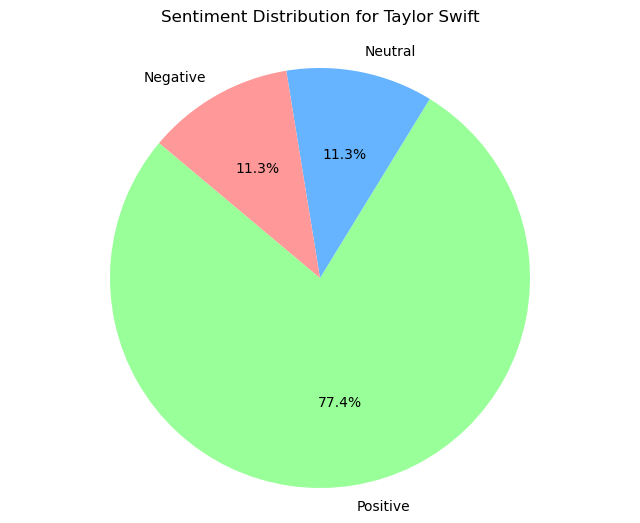

In [41]:
# Create a pie chart

# Define labels for the pie chart
labels = ['Positive', 'Neutral', 'Negative']

# Define sizes for each sentiment category
sizes = [positive_sentiments, neutral_sentiments, negative_sentiments]

# Define colors for each sentiment category
colors = ['#99ff99', '#66b3ff', '#ff9999']

# Create a new figure for the pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart with specified labels, colors, and percentage format
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title of the pie chart
plt.title(f'Sentiment Distribution for {brand_name}\n')

# Set aspect ratio to ensure the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

In [42]:
# Recommendation: To extend the usefulness of this analysys it would be desireable to use the Google News API and
# retrive the data from various time periods, in order to generate a time series of sentiment scores over a longer
# time frame, and then analyse the changes. Alternatively, this analysis could be modified to collect and save the
# data for each time it is run.